In [1]:
#import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,learning_curve,ShuffleSplit
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score,auc,accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


<h2><b>Load the data</b></h2>

In [2]:
df=pd.read_csv("./heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<p>So, we have no null values in our dataset. Thats promising</p>

In [4]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

<h2><b>Exploratory data analysis and Visualization</b></h2>

<p>First of all let's visualize the age distribution in our data</p>

Text(0.5, 0, 'Age in years')

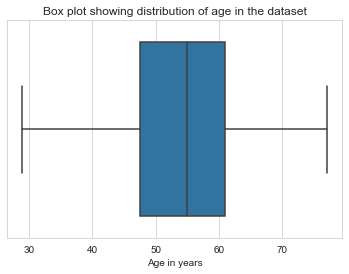

In [5]:
sns.set_style("whitegrid")
sns.boxplot(x="age",data=df)
plt.title("Box plot showing distribution of age in the dataset")
plt.xlabel("Age in years")


In [6]:
#lets see the descriptive stats for this box-plot
IQR=stats.iqr(df["age"],interpolation="midpoint")
IQR

13.5

<p> Observations that can be made from the figure :<br/>
<ul>
    <li>The median age is close to 55 years.</li>
    <li>25 % of the people are less than 48 years of age.</li>
    <li>25% of the people are above 63 years of age.</li>
    <li>There are no visible outliers in the dataset, although 1.5*IQR may beg to differ.</li>
    <li>Interquartile range is about 13.5</li>
    <li>Looks like about 50 percent of the data is about upper medium to early old age.It's kinda true as generally that's the average life expectancy for most of the adults.</li>
</ul>
</p>

### **Let's visualize if a particular gender is more prone to getting a heart disease**

Text(0, 0.5, 'Frequency')

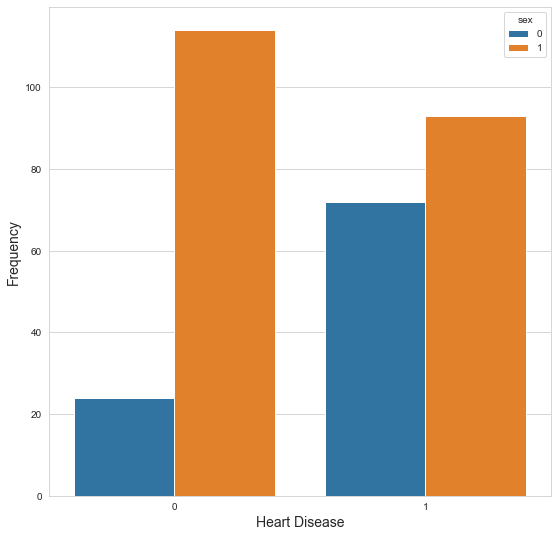

In [7]:
plt.figure(figsize=(9,9))
sns.countplot(x="target",hue="sex",data=df)
plt.xlabel("Heart Disease",fontsize=14)
plt.ylabel("Frequency",fontsize=14)


<p>So,on an average females are more prone to heart diseases</p>
<p>So, gender might be a good predictor for heart disease. We need to dive deeper in order to reach a valid conclusion.</p>

<p>Now, let's see how much is this thalassemia reponsible for heart disease </p>
<p>According to google <i>"Thalassemia is an inherited blood disorder characterised by less oxygen-carrying protein (haemoglobin) and fewer red blood cells in the body than normal."</i>. Or in layman terms, with thalassemia rbc's are destroyed at a rapid rate, which leads to fatigue and maybe heart disease. Who knows? Let's find out.</p>

<p> Well, I found some important points regarding the so called thal variable in this dataset. Check it out so that we can infer better from the graph.
    <ul>
        <li>0 maps to null in the original dataset.</li>
        <li>1 maps to 6 in the original dataset. This means that a fixed defect was found.</li>
        <li> 2 maps to 3 in the original dataset. This means that the blood flow was normal.</li>
        <li> 3 maps to 7 in the original dataset. This means that a reversible defect was found.</li>
</ul>
        </p>

<p>So what do they even mean ??
<ul>
    <li>Fixed Defect(1) means that no blood flows in some part of the heart.</li>
    <li>Reversible Defect(2) means that an abnormal blood flow pattern is observed.</li>
</ul>
</p>

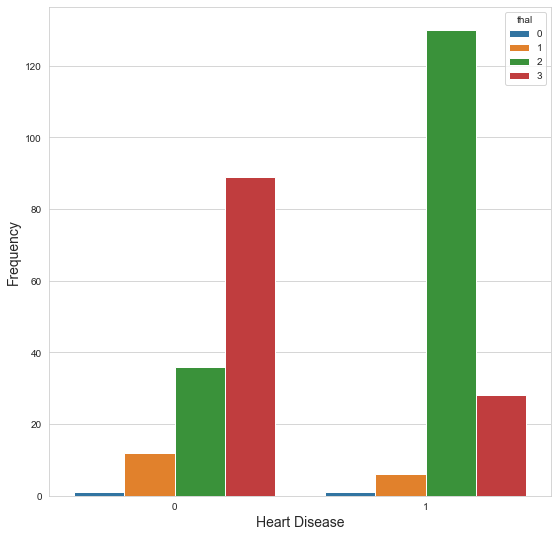

In [8]:
plt.figure(figsize=(9,9))
sns.countplot(x="target",hue="thal",data=df)
plt.xlabel("Heart Disease",fontsize=14)
plt.ylabel("Frequency",fontsize=14)
plt.show()

<p><b>Conclusions:</b>
<ul>
    <li>People suffering from heart disease generally have a type-2 thalassemia. i.e abnormal blood flow pattern is observed.</li>
    <li>Healthy people generally have a normal blood flow.</li>
    <li>Fixed Defect thalassemia is present in both. But there aren't enough samples to make an absolute decision.</li>
    <li>Looks like fixed defect thalassemia is not such a good indicator of whether a person is likely to suffer from a heart disease or not. Will be removed during one hot encoding</li>
    <b> Well abnormal blood flow in heart can cause a shock or..... an attack !!</b>
</ul> 
    </p>

<p> <b>Now , lets see how the chestpain affects the chances of getting a heart disease</b></p>

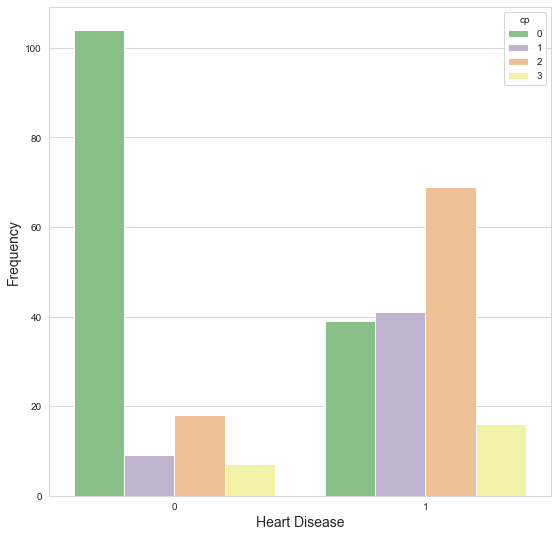

In [9]:
plt.figure(figsize=(9,9))
sns.countplot(x="target",hue="cp",data=df,palette="Accent")
plt.xlabel("Heart Disease",fontsize=14)
plt.ylabel("Frequency",fontsize=14)
plt.show()

<p><b>Conclusions:</b><br/>
    <ul>
        <li>1: typical angina:more in people with heart disease.</li>
        <li>2: atypical angina : more in people with heart disease.</li>
        <li>3: non-anginal pain : not conclusive</li>
        <li>0: asymptomatic : people with type 0 cp are not that likely to have a heart disease.</li>

  </ul>
</p>

<p> <b>Understanding the pattern for exercise induced angina</b></p>

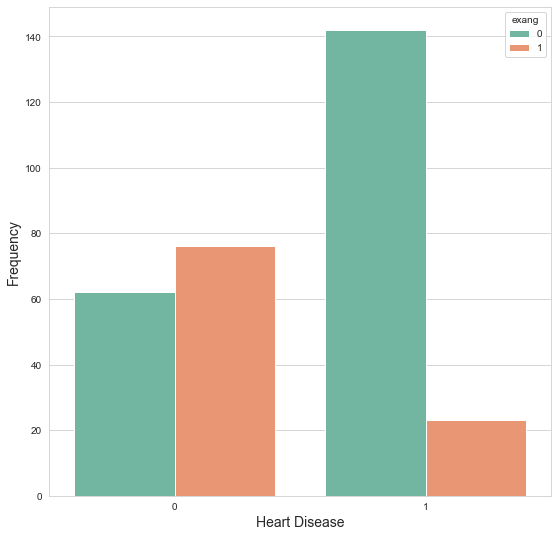

In [10]:
plt.figure(figsize=(9,9))
sns.countplot(x="target",hue="exang",data=df,palette="Set2")
plt.xlabel("Heart Disease",fontsize=14)
plt.ylabel("Frequency",fontsize=14)
plt.show()

<p>
<b>Conclusions:</b><ul>
    <li>
    So, most people who had a heart disease, didn't have exercise induced angina/pain.
    </li>
    <li>
        People who didn't suffer from heart disease had approximately the same probability of suffering from exang and not suffering from it.
    </li>
    </ul>
</p>

<p><b>FBS</b></p>
</p>It signifies The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
Greater than 120mg/dl means suffering from diabetes.</p>

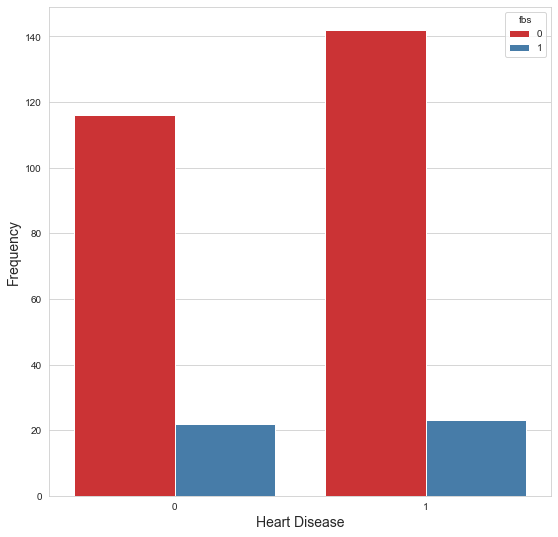

In [11]:
plt.figure(figsize=(9,9))
sns.countplot(x="target",hue="fbs",data=df,palette="Set1")
plt.xlabel("Heart Disease",fontsize=14)
plt.ylabel("Frequency",fontsize=14)
plt.show()

<p> Nothing conclusive can be said. The number of high fbs and low fbs are looking very close in both the cases</p>

<p>Time to look at the trend for restecg.<br/><b>restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)</b></p>

In [12]:
copy_df=df.copy()


In [13]:
copy_df['restecg'][copy_df['restecg']==0]='normal'
copy_df['restecg'][copy_df['restecg']==1]="ST-T wave abnormality"
copy_df['restecg'][copy_df['restecg']==2]="left ventricular hypertrophy"
copy_df['slope'].value_counts()

<ipython-input-13-d72ddfe55bfe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_df['restecg'][copy_df['restecg']==0]='normal'


2    142
1    140
0     21
Name: slope, dtype: int64

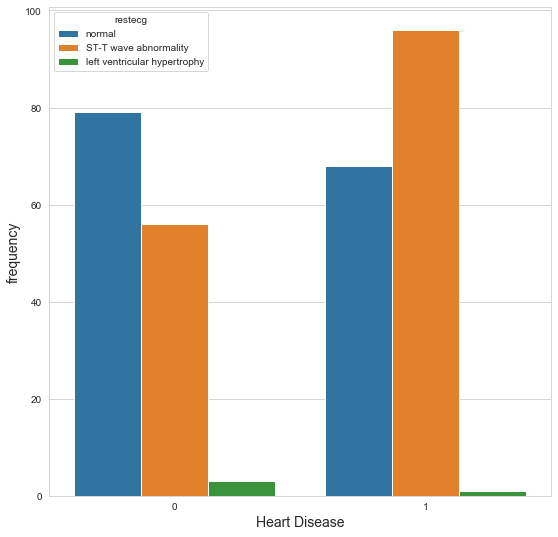

In [14]:
plt.figure(figsize=(9,9))
sns.countplot(x="target",hue="restecg",data=copy_df)
plt.xlabel("Heart Disease",fontsize=14)
plt.ylabel("frequency",fontsize=14)
plt.show()

<p><b>Conclusions:</b>
    <ul>
    <li>ST-T wave abnormality is predominant in people with heart disease.Which is true considering that, ST-T wave abnormality is predominant in people with heart disease. </li>
        <li>Not enough samples for left ventricular hypertrophy. So it cannot be deciding factor to predict heart disease as sample size won't allow it to be a major predictor in classification algorithm.</li>
        <li>Normal ecg test scores are higher in people who not suffering from heart disease, but not by a very satisfactory margin.</li>
    </ul>
    </p>

<p> Now let's understand what slope is.In this dataset it is the slope of the peak exercise ST segment.Exercise tolerance testing is an important diagnostic and prognostic tool for assessing patients with suspected or known ischaemic heart disease. During exercise, coronary blood flow must increase to meet the higher metabolic demands of the myocardium. Limiting the coronary blood flow may result in electrocardiographic changes.ST segment depression (horizontal or downsloping) is the most reliable indicator of exercise-induced ischaemia.  </p>
<p>Value 1: upsloping, Value 2: flat, Value 3: downsloping)</p>

In [15]:
copy_df['slope'][copy_df['slope']==0]='downsloping'
copy_df['slope'][copy_df['slope']==2]="flat"
copy_df['slope'][copy_df['slope']==1]="upsloping"


<ipython-input-15-80ac2ce88fd7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_df['slope'][copy_df['slope']==0]='downsloping'


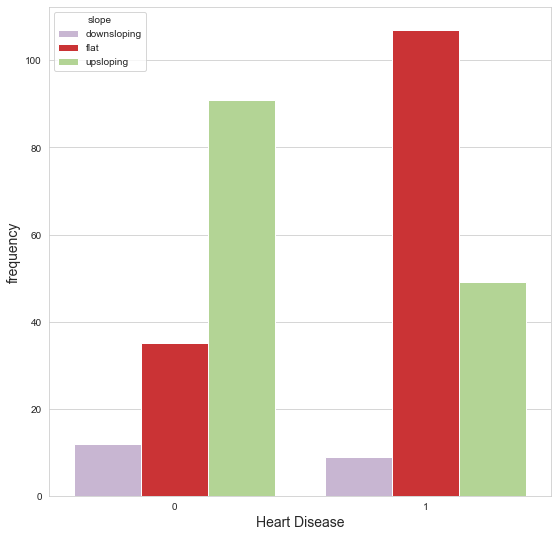

In [16]:
plt.figure(figsize=(9,9))
sns.countplot(x="target",hue="slope",data=copy_df,palette="Paired_r")
plt.xlabel("Heart Disease",fontsize=14)
plt.ylabel("frequency",fontsize=14)
plt.show()

<p><b>Conclusions:</b>
    <ul>
        <li>Upsloping in st segment means normal electrocardiographic changes during exercise. Which is good. And from the plot, healthy people generally have upsloping st segments.</li>
        <li>Downsloping means abnormal electrocardiographic changes, which is bad. And people suffering from heart diseases generally give such readings.</li>
</ul>
    </p>

<p>So, now we are done with basic categorical understanding. Let's get started with the quantitative variable analysis</p>

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<h2><b>Let's see which age group and gender have more cholestrol levels</b></h2>

In [18]:
copy_df['sex'][copy_df['sex']==0]="female"
copy_df['sex'][copy_df["sex"]==1]="male"

<ipython-input-18-67813210e3a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_df['sex'][copy_df['sex']==0]="female"


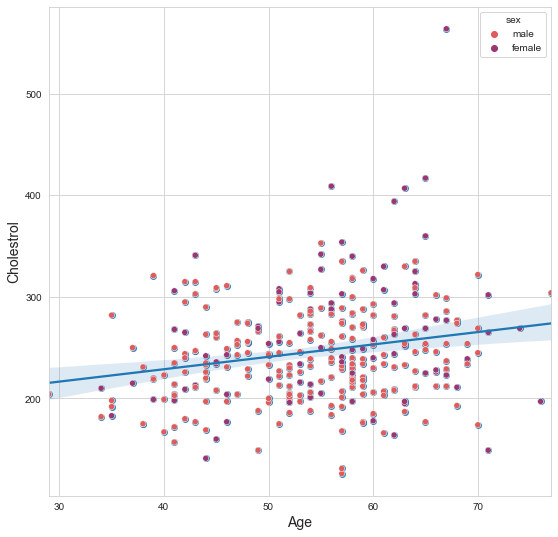

In [19]:

plt.figure(figsize=(9,9))
sns.regplot(x="age",y="chol",data=copy_df)
sns.scatterplot(x="age",y="chol",data=copy_df,hue="sex",palette="flare")
plt.xlabel("Age",fontsize=14)
plt.ylabel("Cholestrol",fontsize=14)
plt.show()

<p>So, there is a weak positive correlation between age and cholestrol.(essentially no correlation)</p>
<p>Some old women have unusually high cholestrol levels</p>

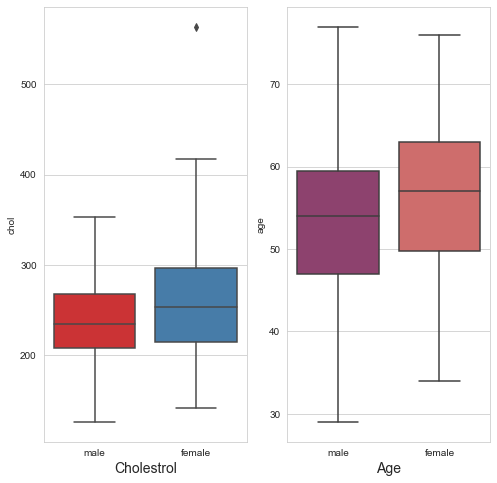

In [20]:
figure,axs=plt.subplots(1,2,figsize=(8,8))
sns.boxplot(x="sex",y="chol",data=copy_df,palette="Set1",ax=axs[0])
sns.boxplot(x="sex",y="age",data=copy_df,palette="flare_r",ax=axs[1])
axs[0].set_xlabel("Sex",fontsize=14)
axs[0].set_xlabel("Cholestrol",fontsize=14)
axs[1].set_xlabel("Sex",fontsize=14)
axs[1].set_xlabel("Age",fontsize=14)
plt.show()

<p>Well! We were right. Some outliers are present</p>
<p>From the distribution, it is evident that on an average, females have higher cholestrol levels than male.</p>
<p> 50% females in the dataset have cholestrol between 220-300. While half the male people in the dataset have have cholestrol levels between 210-260</p>
<p>50 % of the males in the dataset are between 48-60 years of age whilst on the other hand 50% of the females are between 49-65 years of age</p>

<h2>Swarm plot for various categorical data and heart disease</h2>

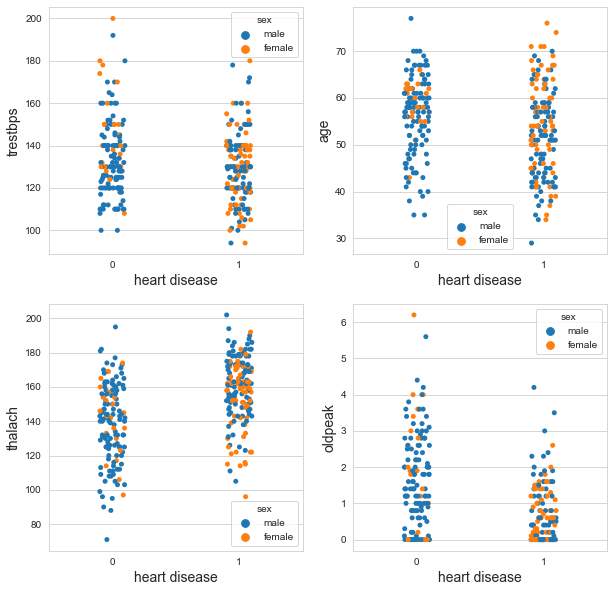

In [21]:
figure,axs=plt.subplots(2,2,figsize=(10,10))
y_labels=['trestbps','age','thalach','oldpeak']
index=0
for i,j in zip([0,0,1,1],[0,1,0,1]):
    sns.stripplot(x="target",y=y_labels[index],hue="sex",data=copy_df,ax=axs[i][j])
    axs[i][j].set_xlabel("heart disease",fontsize=14)
    axs[i][j].set_ylabel(y_labels[index],fontsize=14)
    index+=1
    

plt.show()

<p>1. So, people with higher resting blood pressure don't necessarily have heart disease</p>
<p>2. People with maximum possible heart rates(thalach) above 140 generally suffer from a heart disease</p>
<p>3. People with lower old peaks are prone to heart diseases.</p>
<p>4. Looks like age doesn't  tell alone if a person suffers from heart disease or not.</p>

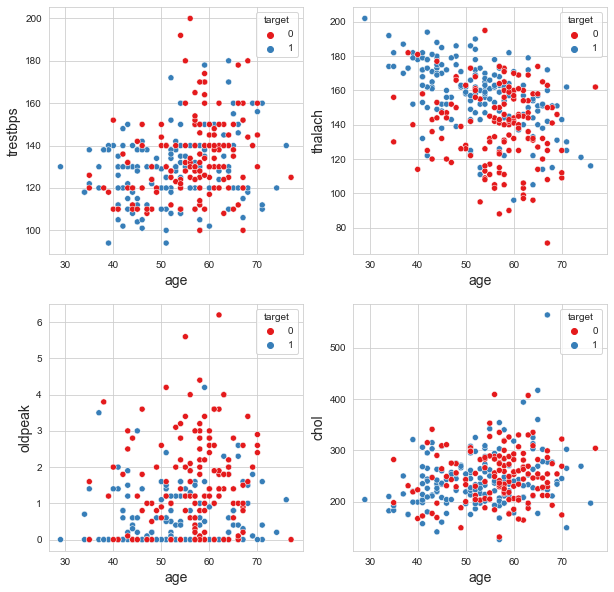

In [22]:
figure,axs=plt.subplots(2,2,figsize=(10,10))
y_labels=['trestbps','thalach','oldpeak',"chol"]
index=0
for i,j in zip([0,0,1,1],[0,1,0,1]):
    sns.scatterplot(x="age",y=y_labels[index],hue="target",data=copy_df,ax=axs[i][j],palette="Set1")
    axs[i][j].set_xlabel("age",fontsize=14)
    axs[i][j].set_ylabel(y_labels[index],fontsize=14)
    index+=1
    

plt.show()


<p>1. People below 50 years of age and having low trestbps generally suffer from heart disease. </p>
<p>2. People with lower age and high maximum possible heart rates(thalach) suffer from heart disease.</p>
<p>3. People with lower oldpeak irrespective of the age have heart disease</p>
<p>4. Young people with cholestrol generally have heart disease. Cholestrol increases with age so having high cholestrol levels during young age is bad</p>

<h2>Pairplot for numeric variables</h2>

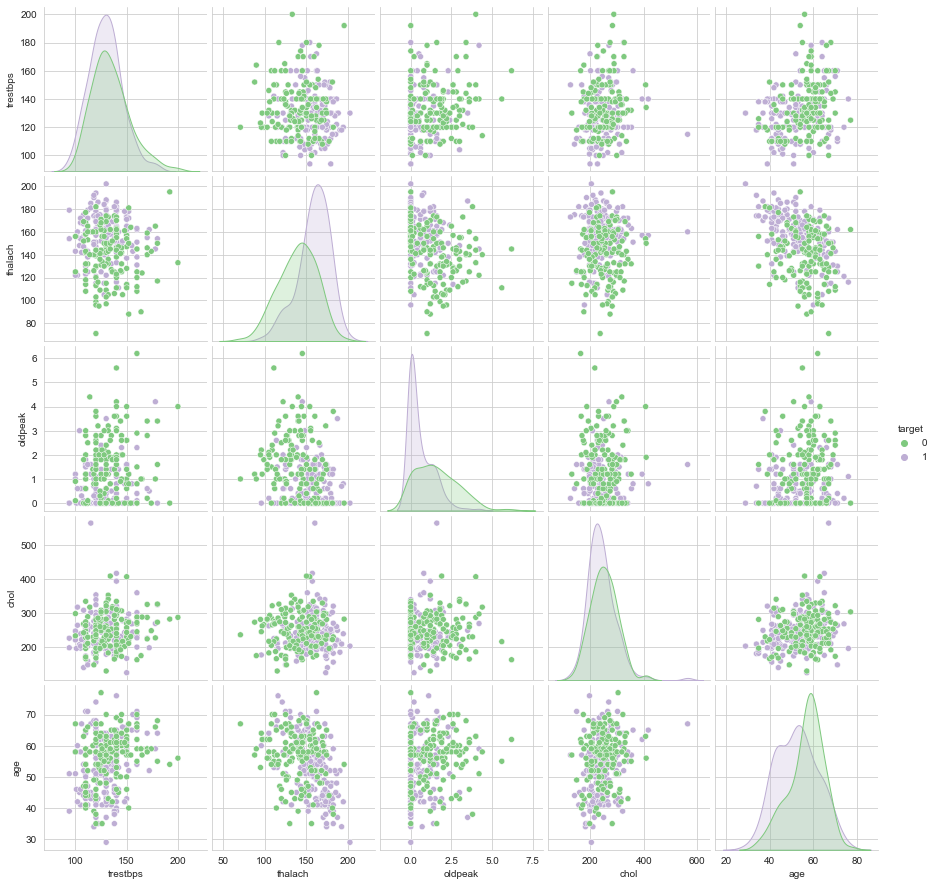

In [23]:
numeric_variables=['trestbps','thalach','oldpeak',"chol","age","target"]
sns.pairplot(copy_df[numeric_variables],hue="target",palette="Accent")

<p>1. Lower tbs means heart disease. </p>
<p>2. High thalach means heart disease.</p>
<p>3. Low oldpeak indicates heart disease. </p>
<p>4. Having even small amounts of cholestrol can lead to a heart disease.</p>
<p>5. Age alone doesn't determine heart disease probability.</p>

<h2>Feature Engineering for Model Selection</h2>

In [24]:
#converting categorical to dummy
hot_encoder=OneHotEncoder()
dummy_columns=["cp","restecg","slope","ca","thal"]
dummy_df=df[dummy_columns]
encoded=hot_encoder.fit_transform(dummy_df).toarray()
features=hot_encoder.get_feature_names(dummy_columns)

dummy_df=pd.DataFrame(encoded,columns=features)
dummy_df.head()

df_new=df.drop(dummy_columns,axis=1)
df_new=pd.concat((dummy_df,df_new),axis=1)
df_new.head()

,cp_0,cp_1,cp_2,cp_3,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,...,thal_3,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,63,1,145,233,1,150,0,2.3,1
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,37,1,130,250,0,187,0,3.5,1
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,41,0,130,204,0,172,0,1.4,1
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,56,1,120,236,0,178,0,0.8,1
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,57,0,120,354,0,163,1,0.6,1


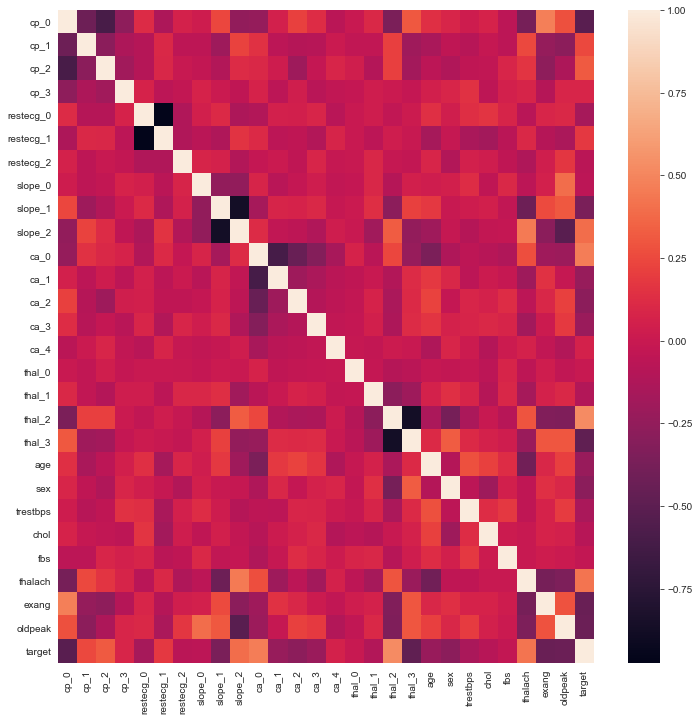

In [25]:
plt.figure(figsize=(12,12))
sns.heatmap(data=df_new.corr())
plt.show()

<p>looks like we fell into the dummy variable trap.</p>

In [26]:
#using pandas to get out of dummy variable trap
dummy_df=pd.get_dummies(df[dummy_columns].astype(str),drop_first=True)
dummy_df.head()

,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0,1,0,1,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,0,0,1,0
3,1,0,0,1,0,0,1,0,0,0,0,0,1,0
4,0,0,0,1,0,0,1,0,0,0,0,0,1,0


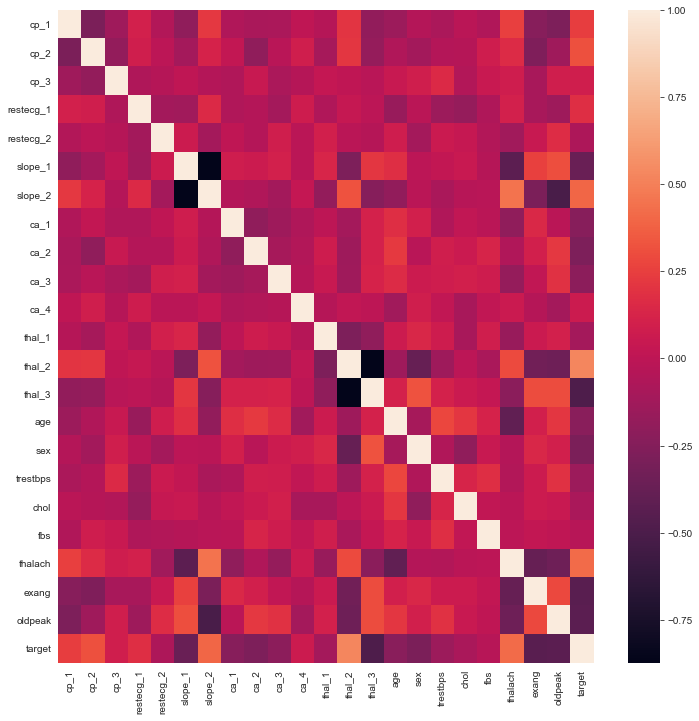

In [27]:
#constructing a new dataframe
df_new =df.drop(dummy_columns,axis=1)
df_new=pd.concat((dummy_df,df_new),axis=1)
plt.figure(figsize=(12,12))
sns.heatmap(data=df_new.corr())
plt.show()


<p>still some of the variables are highly correlated</p>

In [28]:
#we will choose best feature from thal_2,thal_3 and slope_2, slope_1
features=["thal_2","thal_3","slope_2","slope_1"]
for feat in features:
    print(df_new[[feat,"target"]].corr())
    
#so, thal_2 and slope_2 has higher correlation between target features
#dropping thal_3 and slope_1
df_new.drop(labels=["thal_3","slope_1"],inplace=True,axis=1)
df_new.head()

          thal_2    target
thal_2  1.000000  0.527334
target  0.527334  1.000000
          thal_3    target
thal_3  1.000000 -0.486112
target -0.486112  1.000000
          slope_2    target
slope_2  1.000000  0.394066
target   0.394066  1.000000
          slope_1    target
slope_1  1.000000 -0.362053
target  -0.362053  1.000000


,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_2,ca_1,ca_2,ca_3,ca_4,...,thal_2,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target
0,0,0,1,0,0,0,0,0,0,0,...,0,63,1,145,233,1,150,0,2.3,1
1,0,1,0,1,0,0,0,0,0,0,...,1,37,1,130,250,0,187,0,3.5,1
2,1,0,0,0,0,1,0,0,0,0,...,1,41,0,130,204,0,172,0,1.4,1
3,1,0,0,1,0,1,0,0,0,0,...,1,56,1,120,236,0,178,0,0.8,1
4,0,0,0,1,0,1,0,0,0,0,...,1,57,0,120,354,0,163,1,0.6,1


<h2>Model Training</h2>

In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
y=df_new['target']
X=df_new.drop(labels='target',axis=1)
print(X.shape,y.shape)

#normalizing the data
columns=X.columns
X=pd.DataFrame(scaler.fit_transform(X),columns=columns)


#splitting the data into train and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)
print(y_train.value_counts())
print(y_test.value_counts())

(303, 20) (303,)
1    124
0    103
Name: target, dtype: int64
1    41
0    35
Name: target, dtype: int64


In [30]:
X_train.describe().apply(lambda s:s.apply('{0:.5f}'.format))

,cp_1,cp_2,cp_3,restecg_1,restecg_2,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak
count,227.00000,227.00000,227.00000,227.00000,227.00000,227.00000,227.00000,227.00000,227.00000,227.00000,227.00000,227.00000,227.00000,227.00000,227.00000,227.00000,227.00000,227.00000,227.00000,227.00000
mean,-0.02918,0.06642,-0.00384,0.03635,0.03872,0.00545,0.01399,-0.05944,0.01804,-0.02579,-0.00904,0.01449,0.01693,-0.04809,-0.08444,-0.00221,-0.05838,0.00292,-0.02037,-0.01022
std,0.97502,1.03091,0.99602,1.00143,1.15529,1.00254,1.01182,0.93050,1.03316,0.89839,0.98513,1.00071,1.02500,1.01987,0.97278,1.03523,0.94079,0.98859,0.99443,0.95418
min,-0.44455,-0.63465,-0.28661,-1.00331,-0.11566,-0.93914,-0.52260,-0.37868,-0.26584,-0.12953,-0.25131,-1.10076,-2.79762,-1.46842,-2.14880,-2.22753,-0.41763,-2.69585,-0.69663,-0.89686
25%,-0.44455,-0.63465,-0.28661,-1.00331,-0.11566,-0.93914,-0.52260,-0.37868,-0.26584,-0.12953,-0.25131,-1.10076,-0.70214,-1.46842,-0.66387,-0.68149,-0.41763,-0.70611,-0.69663,-0.89686
50%,-0.44455,-0.63465,-0.28661,0.99671,-0.11566,-0.93914,-0.52260,-0.37868,-0.26584,-0.12953,-0.25131,0.90846,0.18017,0.68101,-0.09274,-0.14038,-0.41763,0.14663,-0.69663,-0.20671
75%,-0.44455,1.57568,-0.28661,0.99671,-0.11566,1.06480,-0.52260,-0.37868,-0.26584,-0.12953,-0.25131,0.90846,0.73162,0.68101,0.47839,0.53601,-0.41763,0.71513,1.43548,0.48345
max,2.24944,1.57568,3.48911,0.99671,8.64581,1.06480,1.91351,2.64077,3.76165,7.72010,3.97911,0.90846,2.49624,0.68101,3.44826,6.14040,2.39444,2.28943,1.43548,3.93423


<h2>SVM</h2>

<p>We will use hyper-parameter tuning to find the best params for the svc classifier</p>

In [31]:
C=[0.01,0.03,0.1,0.3,1,3,10,30,100]
gamma=[0.01,0.03,0.1,0.3,1,3,10,30,100]
kernel=['rbf','poly','sigmoid']
params={'C':C,'gamma':gamma,'kernel':kernel}

In [32]:
#comment out to run
# grid_s=GridSearchCV(SVC(),params,verbose=3)
# grid_s.fit(X_train,y_train)
# print(grid_s.best_estimator_)
# print(grid_s.best_params_)

<p> the best params that I got for svm were</p>
<p>SVC(C=100, gamma=0.01, kernel='sigmoid')</p>

In [33]:
#fit the model
model=SVC(C=100,gamma=0.01,kernel="sigmoid")
model.fit(X_train,y_train)


SVC(C=100, gamma=0.01, kernel='sigmoid')

In [34]:
#learning curve plotter function
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

<module 'matplotlib.pyplot' from '/home/aahan/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

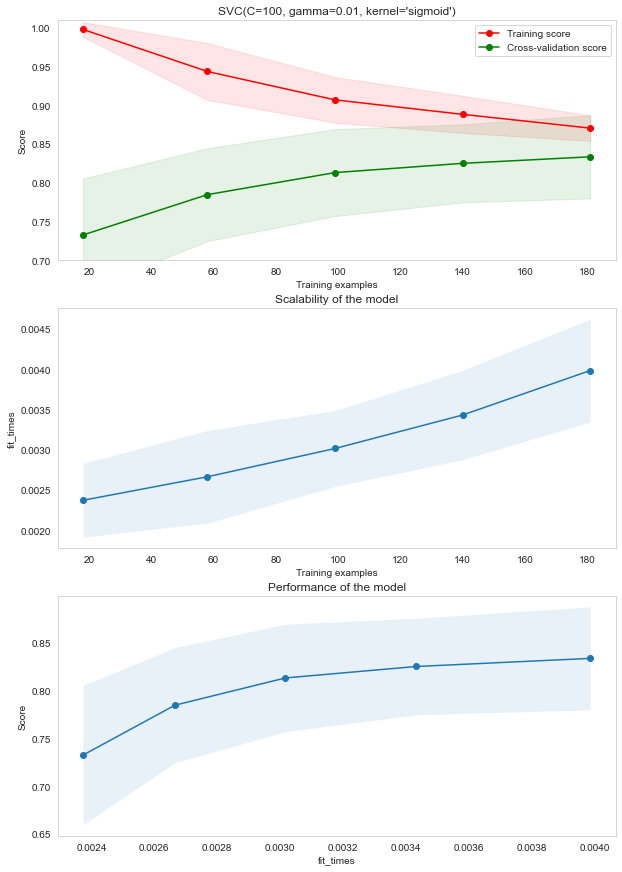

In [35]:

fig, axes = plt.subplots(3, 1, figsize=(10, 15))
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
plot_learning_curve(model, "SVC(C=100, gamma=0.01, kernel='sigmoid')", X_train, y_train, axes=axes, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

In [36]:
#some helper functions
#accuracy score
def score(y_test,predictions):
    print(classification_report(y_test,predictions))
    print(pd.DataFrame(predictions).value_counts())
    print("Accuracy score ={score}".format(score=accuracy_score(y_test,predictions)))

#confusion matrix plotter
def plot_matrix(y_test,predictions):
    matrix=confusion_matrix(y_test,predictions)
    matrix=matrix.transpose()
    cm_df=pd.DataFrame(matrix,index=["Healthy","Heart Disease"],columns=["Healthy","Heart Disease"])
    sns.heatmap(cm_df,annot_kws={"size":16},annot=True,fmt="d")

#roc curve plotter
def plot_roc(y_test,predictions):
    actual_vals=pd.DataFrame(pd.get_dummies(y_test))
    predictions=pd.DataFrame(pd.get_dummies(predictions))
    print('0: {}'.format(predictions[predictions[0]==1][0].sum()))
    print('1 :{}'.format(predictions[predictions[1]==1][1].sum()))
    predictions.head()
    #compute roc curve and roc area for each curve
    fpr=dict()
    tpr=dict()
    roc_auc=dict()
    n_classes=2

    #loop for each class
    for i in range(n_classes):
        fpr[i],tpr[i],_=roc_curve(actual_vals.iloc[:,i],predictions.iloc[:,i])
        roc_auc[i]=auc(fpr[i],tpr[i])
    #micro-average roc curve
    fpr["micro"],tpr["micro"],_=roc_curve(actual_vals.to_numpy().ravel(),predictions.to_numpy().ravel())
    roc_auc["micro"]=auc(fpr["micro"],tpr["micro"])
    
    colors = [ 'darkorange', 'cornflowerblue']
    #main plotter
    lw=2
    plt.figure(figsize=(10,8))
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)
    labels=['Healthy','Heart Disease']
    for i,color in zip(range(n_classes),colors):
         plt.plot(fpr[i], tpr[i], color=color,lw=lw,label='ROC curve of class {0} {name} (area = {area:0.2f})'
                 ''.format(i, name=labels[i],area=roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for heart disease prediction')
    plt.legend(loc="lower right")
    plt.show()
    

In [37]:
predictions=model.predict(X_test)
score(y_test,predictions)

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        35
           1       0.83      0.83      0.83        41

    accuracy                           0.82        76
   macro avg       0.81      0.81      0.81        76
weighted avg       0.82      0.82      0.82        76

1    41
0    35
dtype: int64
Accuracy score =0.8157894736842105


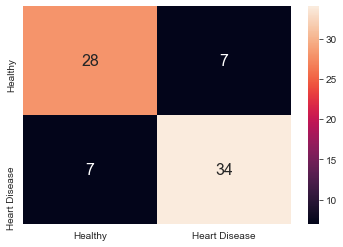

In [38]:
#confusion matrix
plot_matrix(y_test,predictions)

0: 35
1 :41


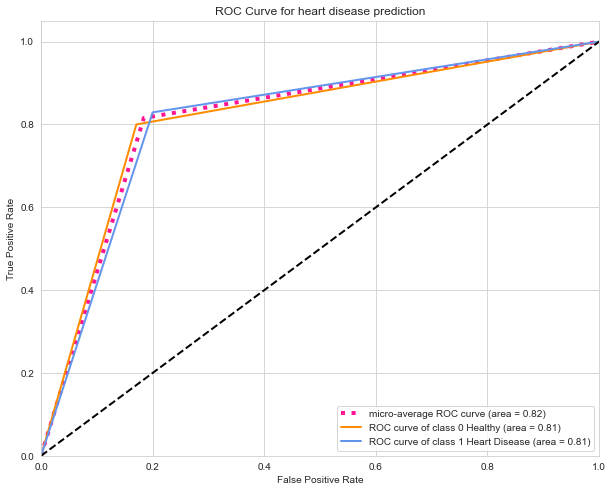

In [39]:
#roc curve
plot_roc(y_test,predictions)

<h2>Decision Tree</h2>

In [40]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
predictions=model.predict(X_test)
score(y_test,predictions)

              precision    recall  f1-score   support

           0       0.64      0.80      0.71        35
           1       0.78      0.61      0.68        41

    accuracy                           0.70        76
   macro avg       0.71      0.70      0.70        76
weighted avg       0.71      0.70      0.70        76

0    44
1    32
dtype: int64
Accuracy score =0.6973684210526315


<p> Not that good. Performing hyperparameter tuning</p>

In [41]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}


#hyper parameter tuning using grid search
grid_s=GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=params,cv=4,n_jobs=-1,verbose=1,scoring="accuracy")
grid_s.fit(X_train,y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [42]:
print(grid_s.best_params_)
print(grid_s.best_estimator_)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5}
DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)


In [43]:
model=DecisionTreeClassifier(max_depth=5, min_samples_leaf=5,criterion="gini")
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)

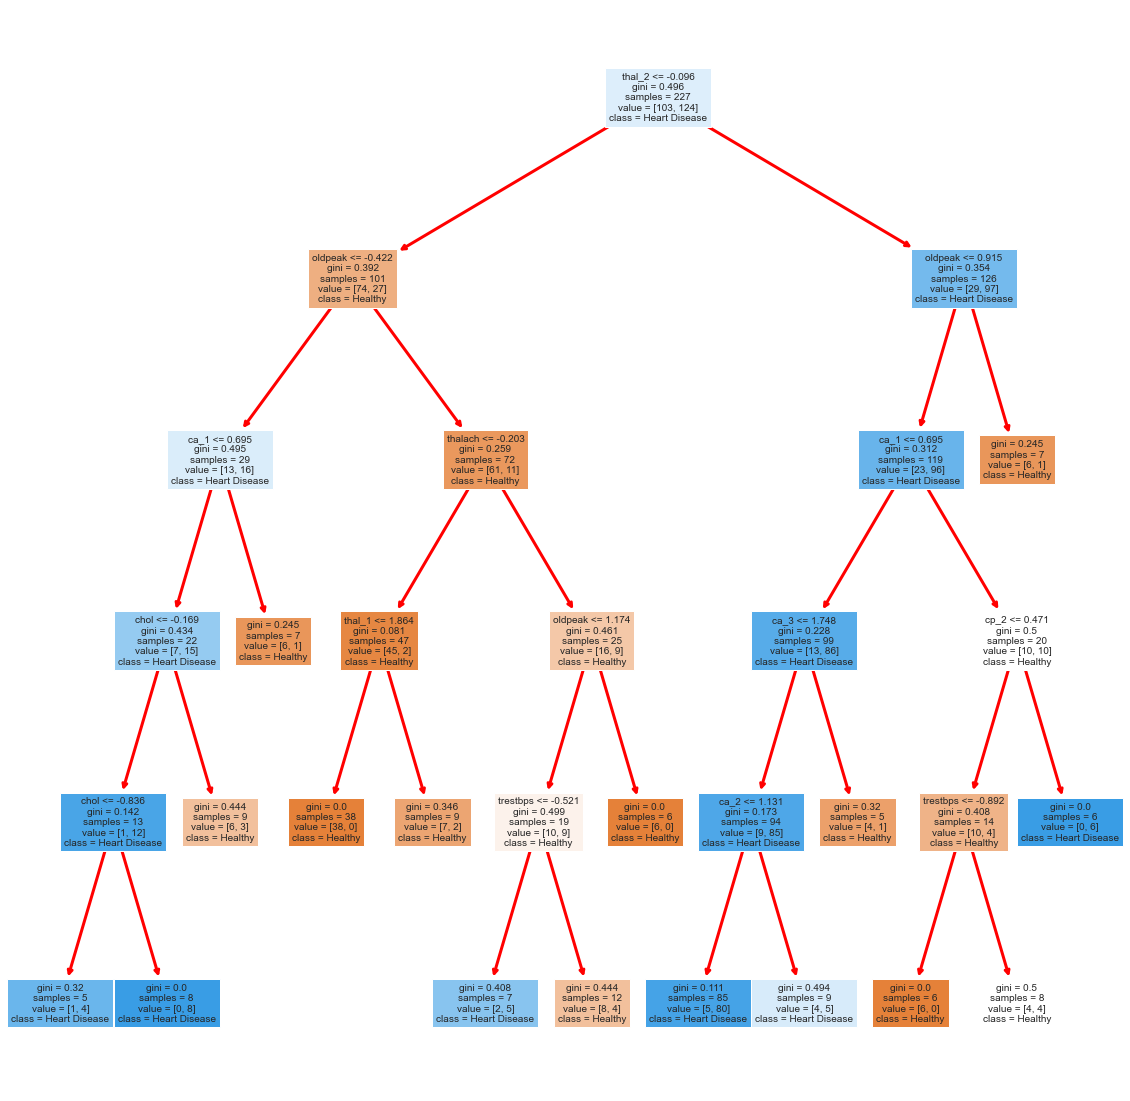

In [44]:
from sklearn import tree
fig = plt.figure(figsize=(20,20))
out= tree.plot_tree(model,
                   feature_names=X_train.columns,
                   class_names=['Healthy', "Heart Disease"],
                   filled=True)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('red')
        arrow.set_linewidth(3)


<h2>Predictions and accuracy </h2>

In [45]:
predictions=model.predict(X_test)
score(y_test,predictions)

              precision    recall  f1-score   support

           0       0.71      0.83      0.76        35
           1       0.83      0.71      0.76        41

    accuracy                           0.76        76
   macro avg       0.77      0.77      0.76        76
weighted avg       0.77      0.76      0.76        76

0    41
1    35
dtype: int64
Accuracy score =0.7631578947368421


<h2> Confusion Matrix</h2>

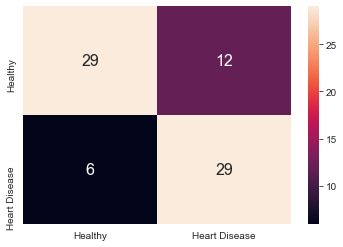

In [46]:
plot_matrix(y_test,predictions)

<h2>Roc Curve</h2>

0: 41
1 :35


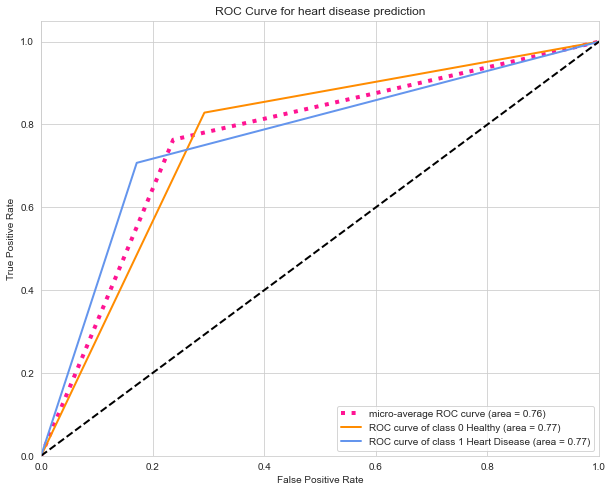

In [47]:
plot_roc(y_test,predictions)

<h2>Logistic Regression</h2>

In [48]:
model=LogisticRegression()
model.fit(X_train,y_train)
predictions=model.predict(X_test)
score(y_test,predictions)

              precision    recall  f1-score   support

           0       0.87      0.77      0.82        35
           1       0.82      0.90      0.86        41

    accuracy                           0.84        76
   macro avg       0.85      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76

1    45
0    31
dtype: int64
Accuracy score =0.8421052631578947


<h2>Hyperparameter tuning</h2>

In [49]:
C=[0.01,0.03,0.1,0.3,1,3,10,30,100]
penalty=["l1", "l2", "elasticnet"]

params={'C':C,'penalty':penalty}

#hyper parameter tuning using grid search
grid_s=GridSearchCV(estimator=LogisticRegression(),param_grid=params,cv=4,n_jobs=-1,verbose=1,scoring="accuracy")
grid_s.fit(X_train,y_train)

Fitting 4 folds for each of 27 candidates, totalling 108 fits


/home/aahan/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.81939223        nan        nan 0.8324718         nan
        nan 0.84124373        nan        nan 0.85001566        nan
        nan 0.85463659        nan        nan 0.85025063        nan
        nan 0.84586466        nan        nan 0.84586466        nan
        nan 0.8414787         nan]
  warnings.warn(


GridSearchCV(cv=4, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy', verbose=1)

In [50]:
print(grid_s.best_estimator_)
print(grid_s.best_params_)


LogisticRegression(C=1)
{'C': 1, 'penalty': 'l2'}


In [51]:
model=LogisticRegression(C=1,penalty='l2')
model.fit(X_train,y_train)

LogisticRegression(C=1)

<h2>Learning Curve</h2>

<module 'matplotlib.pyplot' from '/home/aahan/.local/lib/python3.8/site-packages/matplotlib/pyplot.py'>

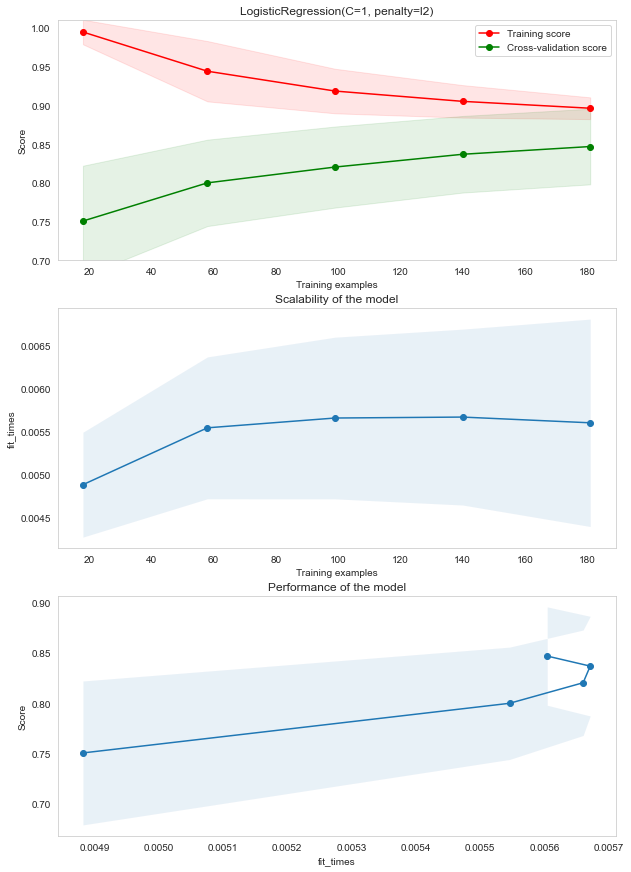

In [52]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
plot_learning_curve(model, "LogisticRegression(C=1, penalty=l2)", X_train, y_train, axes=axes, ylim=(0.7, 1.01),
                    cv=cv, n_jobs=4)

<h2>Predictions and accuracy</h2>

In [53]:
predictions=model.predict(X_test)
score(y_test,predictions)

              precision    recall  f1-score   support

           0       0.87      0.77      0.82        35
           1       0.82      0.90      0.86        41

    accuracy                           0.84        76
   macro avg       0.85      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76

1    45
0    31
dtype: int64
Accuracy score =0.8421052631578947


<h2>Confusion Matrix</h2>

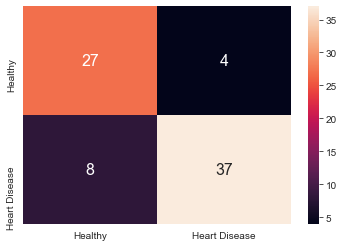

In [54]:
plot_matrix(y_test,predictions)

<h2>ROC Curve</h2>

0: 31
1 :45


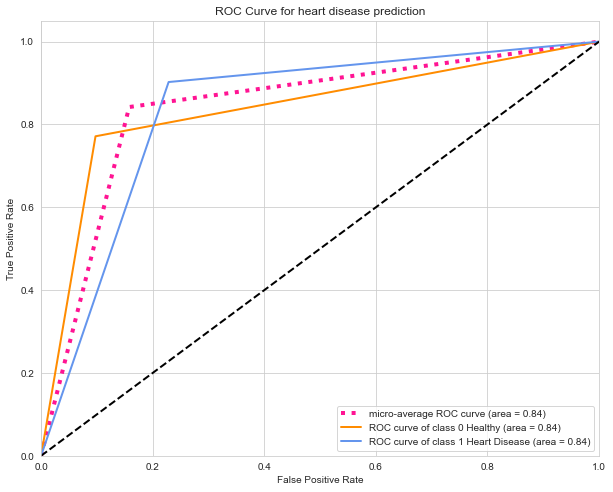

In [55]:
plot_roc(y_test,predictions)